### https://dcc.ligo.org/LIGO-P1700349/public

In [1]:
%matplotlib inline
import gwpy
import matplotlib.pyplot as plt
import numpy as np
import bilby

In [180]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = 1187008882.43
print("GW170817 GPS:", gps)
start = int(gps)-300
end = int(gps)+100

#ldata = TimeSeries.read('L-L1_LOSC_CLN_4_V1-1187007040-2048.hdf5')
#ldata = TimeSeries.read("path=${HOME}/hemantakumar.phurailatpam/eccn3pn/test/qtransform/L-L1_LOSC_CLN_4_V1-1187007040-2048.hdf5", format='hdf5')
print("GW170817 data")
#print(ldata)

GW170817 GPS: 1187008882.43
GW170817 data


In [ ]:
import h5py
filename = "L-L1_LOSC_CLN_4_V1-1187007040-2048.hdf5"
f = h5py.File(filename, 'r')

In [ ]:
for key in f.keys():
    print(key)

meta
quality
strain


In [ ]:
#Get the HDF5 group
group = f['meta']

#Checkout what keys are inside that group.
for key in group.keys():
    print(key)

Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart


In [ ]:
group2 = group['Duration']

In [ ]:
list(f.keys())

['meta', 'quality', 'strain']

In [113]:
list(f['quality'].keys())

['detail', 'injections', 'simple']

In [158]:
strain_data = np.array(f['strain']['Strain'])
gps = 1187008882.43
start = int(gps)-50
end = int(gps)+5
start2 = (start-1187007040)*4096
end2 = (end-1187007040)*4096
strain_data = strain_data[start2:end2]

In [159]:
ldata_L1 = TimeSeries(data=strain_data,\
           unit=None,\
           t0=1187007040,\
           dt=0.000244140625,\
           name='Strain',\
           channel=None)

In [160]:
print(ldata_L1)
len(ldata_L1)

TimeSeries([-4.65892811e-20, -4.39749591e-20, -4.03810968e-20,
            ..., -3.08422967e-18, -3.08179328e-18,
            -3.08282662e-18]
           unit: dimensionless,
           t0: 1187007040.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


225280

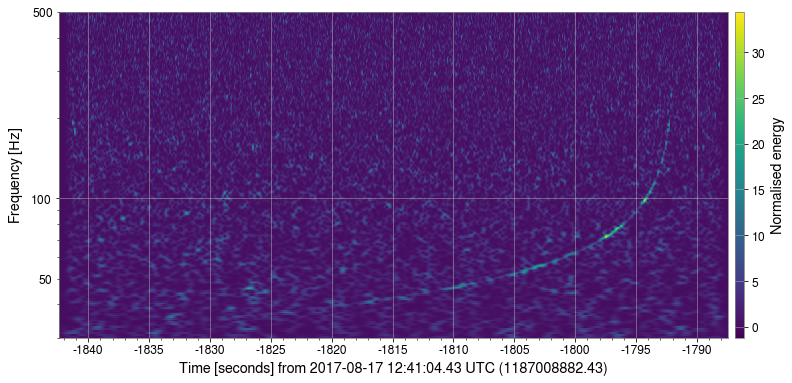

In [161]:
lq = ldata_L1.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

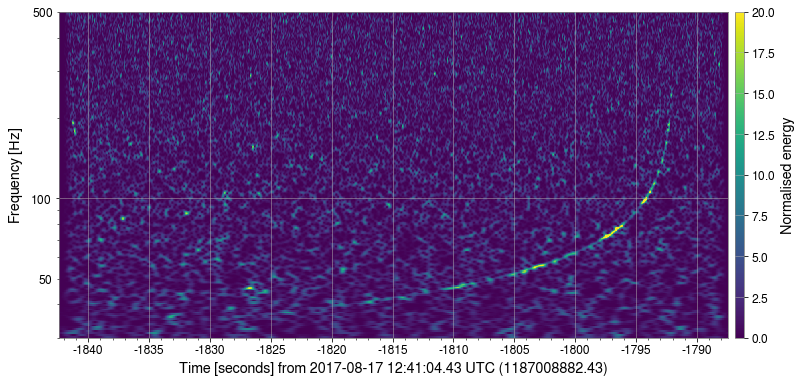

In [162]:
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot

In [166]:
ldata = TimeSeries.fetch_open_data('L1', start, end , cache=True)
strain_data = ldata.value

In [176]:
ldata_L1 = TimeSeries(data=strain_data,\
           unit=None,\
           t0=start,\
           dt=0.000244140625,\
           name='Strain',\
           channel=None)

In [177]:
print(ldata_L1)
len(ldata_L1)

TimeSeries([-1.51915090e-20, -1.26643644e-20, -9.05546809e-21,
            ...,  6.43515284e-20,  6.80497504e-20,
             6.83906719e-20]
           unit: dimensionless,
           t0: 1187008832.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


225280

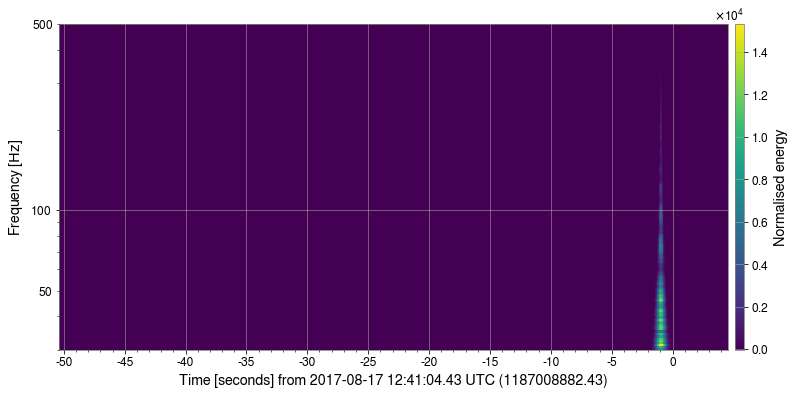

In [178]:
lq = ldata_L1.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

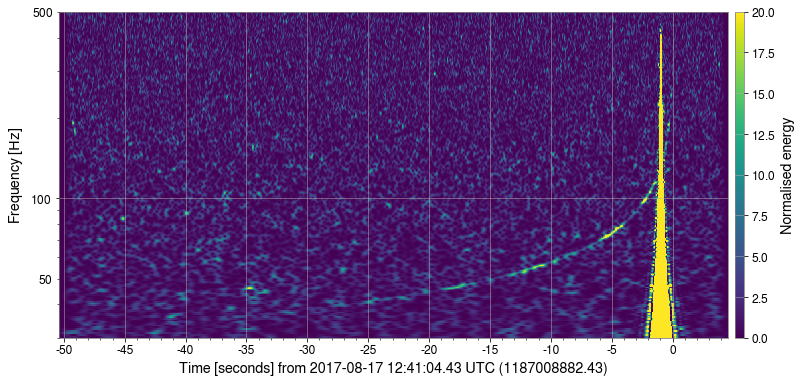

In [179]:
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot

In [193]:
classbilby.core.prior.base.Constraint(minimum, maximum, name=None, latex_label=None, unit=None)
bilby.core.prior.analytical.Gaussian(40.7, 5.57, name='D', latex_label=None, unit='Mpc', boundary='periodic')

Gaussian(mu=40.7, sigma=5.57, name='D', latex_label='D', unit='Mpc', boundary='periodic')

In [ ]:
channel-dict = {H1:/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf, L1:/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf,  V1:/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/V-V1_LOSC_CLN_4_V1-1187007040-2048.gwf}

In [ ]:
data-dict = {'CLN_H1':'/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf', 'CLN_L1':'/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf',  'CLN_V1':'/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/V-V1_LOSC_CLN_4_V1-1187007040-2048.gwf'}

In [ ]:
channel-dict = {H1:'/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf', L1:'/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf',  V1:'/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/V-V1_LOSC_CLN_4_V1-1187007040-2048.gwf'}

In [ ]:
psd-dict = {H1:/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf, L1:/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf,  V1:/home/hemantakumar.phurailatpam/eccn3pn/test/realGW170817/clean_data/V-V1_LOSC_CLN_4_V1-1187007040-2048.gwf}